In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from scipy.optimize import curve_fit

sns.set_context('talk')
sns.set_style("ticks")
sns.set_palette("colorblind")

def line(x,m,b):
    return (m*x) + b
    

def read_QDP(file):
#     Takes in a file and returns an array with the QDP data
    data = [[]]
    i = 0
    j = 0
    for line in file:
        if i >2:
            temp = line.split()
            if temp[0] != 'NO':
                if temp[-1]=='NO':
                    temp = temp[:-1]
                data[-1].append(temp)
            else:
                data.append([])
        i += 1
    for i in range(len(data)):
        data[i] = np.array(data[i]).astype(float).T
    return data

root_dir = '/Users/sean/astro/MAXI_J0655m013/'

plot_dir = root_dir + 'figures/'

sns.set_context('paper')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.set_style({'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True,})
sns.set_palette("colorblind")


# OBSID 80801347002

In [15]:
OBSID='80801347002'

products_dir = root_dir + OBSID + '_products06/'
pipeline_dir = root_dir + OBSID + '_pipe_out/'

ldata_file = open(products_dir + 'tbabs_diskbb_cyclabs_nthcomp_chus23and123_ldata.qdp', 'r')
ldata_data = read_QDP(ldata_file)

cutoffpl_file = open(products_dir + 'tbabs_cutoffpl_frozennH_chus23and123.qdp', 'r')
cutoffpl_data = read_QDP(cutoffpl_file)

nthcomp_file = open(products_dir + 'tbabs_diskbb_nthcomp_chus23and123.qdp', 'r')
nthcomp_data = read_QDP(nthcomp_file)

nthcomp_cyclabs_file = open(products_dir + 'tbabs_nthcomp_cyclabs_chus23and123_ufspec.qdp', 'r')
nthcomp_cyclabs_data = read_QDP(nthcomp_cyclabs_file)

# print(ldata_data)

cyclabs_E=44

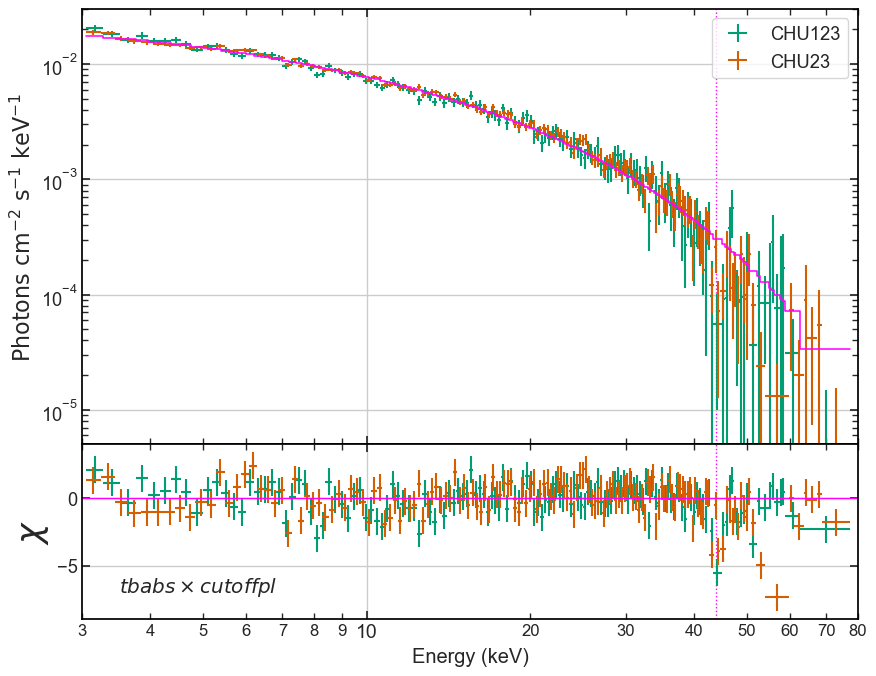

In [16]:
lw = 1.5
# ls = 'steps'
ls=''

# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,  gridspec_kw = {'height_ratios':[5, 2], 'hspace':0}, figsize=(9, 7))
ax1.errorbar(cutoffpl_data[0][0],cutoffpl_data[0][2], xerr=cutoffpl_data[0][1], yerr=cutoffpl_data[0][3], \
             ls=ls, lw=lw, color='C2', label='CHU123')
ax1.errorbar(cutoffpl_data[1][0],cutoffpl_data[1][2], xerr=cutoffpl_data[1][1], yerr=cutoffpl_data[1][3], \
             ls=ls, lw=lw, color='C3', label='CHU23')

ax1.step(np.concatenate([cutoffpl_data[0][0]-cutoffpl_data[0][1], [cutoffpl_data[0][0][-1]+cutoffpl_data[0][1][-1]]]), \
         np.concatenate([cutoffpl_data[0][4], [cutoffpl_data[0][4][-1]]]), where='post', color='magenta', lw=0.75*lw)

# ax1.step(np.concatenate([nthcomp_cyclabs_data[0][0]-nthcomp_cyclabs_data[0][1], [nthcomp_cyclabs_data[0][0][-1]+nthcomp_cyclabs_data[0][1][-1]]]), \
#          np.concatenate([nthcomp_cyclabs_data[0][5], [nthcomp_cyclabs_data[0][5][-1]]]), where='post', color='magenta', ls='dashed', lw=0.75*lw)
# # ax1.step(data_comp_gauss_eeufspec[1][0],data_comp_gauss_eeufspec[1][5], where='mid', color='C1', ls='dashed', lw=lw)

# ax1.step(np.concatenate([nthcomp_cyclabs_data[0][0]-nthcomp_cyclabs_data[0][1], [nthcomp_cyclabs_data[0][0][-1]+nthcomp_cyclabs_data[0][1][-1]]]), \
#          np.concatenate([nthcomp_cyclabs_data[0][6], [nthcomp_cyclabs_data[0][6][-1]]]), where='post', color='magenta', ls='dashed', lw=0.75*lw)
# # ax1.step(data_comp_gauss_eeufspec[1][0],data_comp_gauss_eeufspec[1][6], where='mid', color='C1', ls='dotted', lw=lw)

# ax1.step(np.concatenate([nthcomp_cyclabs_data[0][0]-nthcomp_cyclabs_data[0][1], [nthcomp_cyclabs_data[0][0][-1]+nthcomp_cyclabs_data[0][1][-1]]]), \
#          np.concatenate([nthcomp_cyclabs_data[0][7], [nthcomp_cyclabs_data[0][7][-1]]]), where='post', color='C0', ls='dashed', lw=lw)

ax2.errorbar(cutoffpl_data[0][0],(cutoffpl_data[0][2]-cutoffpl_data[0][4])/cutoffpl_data[0][3], xerr=cutoffpl_data[0][1], yerr=1.0, \
             ls=ls, color='C2', lw=lw)
ax2.errorbar(cutoffpl_data[1][0],(cutoffpl_data[1][2]-cutoffpl_data[1][4])/cutoffpl_data[1][3], xerr=cutoffpl_data[1][1], yerr=1.0, \
             ls=ls, color='C3', lw=lw)

ax1.axvline(cyclabs_E, color='magenta', ls='dotted', lw=1.0, zorder=0)
ax2.axvline(cyclabs_E, color='magenta', ls='dotted', lw=1.0, zorder=0)
ax1.legend(loc=1)

ax1.set_ylim(5e-6,0.03)
ax1.set_xlim(3.0,78.0)
ax1.loglog()
plt.xlabel('Energy (keV)')
ax1.set_ylabel(r'$\mathrm{Photons\ cm^{-2}\ s^{-1}\ keV^{-1}}$', fontsize=16)
# ax2.set_ylabel(r'$\frac{data}{model}$')
# ax2.axhline(1,color='magenta', lw=1.0)
ax2.set_ylabel(r'$\chi$', fontsize=25)
ax2.axhline(0,color='magenta', lw=1.0)
# ax2.set_ylim(-5.3,5.3)

ax2.text(3.5, -7, r'$tbabs \times cutoffpl$')

# ax1.text(2.9, 2e-5, '(a)')
# ax2.text(2.9, -4, '(b)')

# ax1.set_yticks(ticks= [1e-2, 1e-1], minor=False)
# ax1.set_yticks(ticks= [], minor=True)

# ax2.set_yticks(ticks= [-3, 0, 3], minor=False)
# ax2.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)
# ax3.set_yticks(ticks= [-3, 0, 3], minor=False)
# ax3.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)

ax2.set_xticks(ticks= [10], minor=False)
ax2.set_xticklabels(labels= [10], minor=False, fontsize=14)

ax2.set_xticks(ticks= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True)
ax2.set_xticklabels(labels= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True, fontsize=12)

ax1.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)

plt.tight_layout()
plt.savefig(plot_dir + OBSID + '_tbabs_cutoffpl_nocyclabs.pdf')



# OBSID 90801321001

In [10]:
OBSID='90801321001'

products_dir = root_dir + OBSID + '_products/'
pipeline_dir = root_dir + OBSID + '_pipe_out/'

qdp_file = open(products_dir + 'tbabs_nthcomp.qdp', 'r')

qdp_data = read_QDP(qdp_file)

cutoffpl_file = open(products_dir + 'tbabs_cutoffpl.qdp', 'r')

cutoffpl_data = read_QDP(cutoffpl_file)

# print(qdp_data)

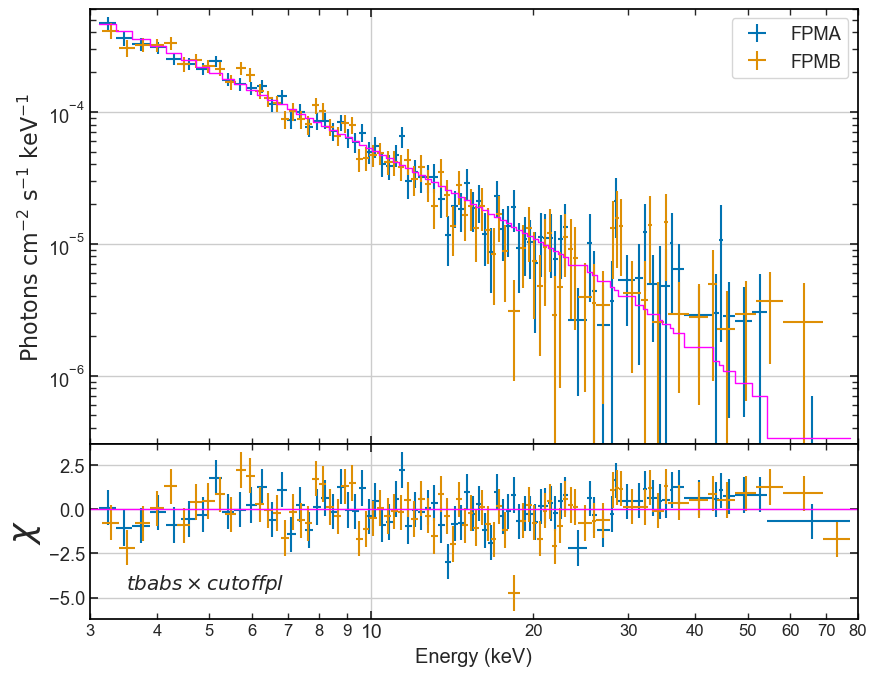

In [12]:
lw = 1.5
# ls = 'steps'
ls=''
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,  gridspec_kw = {'height_ratios':[5, 2], 'hspace':0}, figsize=(9, 7))

# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
for i, fpm in enumerate(['FPMA', 'FPMB']):
    ax1.errorbar(cutoffpl_data[i][0],cutoffpl_data[i][2], xerr=cutoffpl_data[i][1], yerr=cutoffpl_data[i][3], \
                 ls=ls, lw=lw, color='C' +str(i), label=fpm)
    
    ax2.errorbar(cutoffpl_data[i][0],(cutoffpl_data[i][2]-cutoffpl_data[i][4])/cutoffpl_data[i][3], xerr=cutoffpl_data[i][1], yerr=1.0, \
                 ls=ls, color='C' + str(i), lw=lw)

ax1.step(np.concatenate([cutoffpl_data[0][0]-cutoffpl_data[0][1], [cutoffpl_data[0][0][-1]+cutoffpl_data[0][1][-1]]]), \
         np.concatenate([cutoffpl_data[0][4], [cutoffpl_data[0][4][-1]]]), where='post', color='magenta', lw=1.0)

ax2.text(3.5, -4.5, r'$tbabs \times cutoffpl$')

ax1.set_ylim(3e-7,6e-4)
ax1.set_xlim(3.0,78.0)
ax1.loglog()
ax1.legend()
plt.xlabel('Energy (keV)')
ax1.set_ylabel(r'$\mathrm{Photons\ cm^{-2}\ s^{-1}\ keV^{-1}}$', fontsize=16)
# ax2.set_ylabel(r'$\frac{data}{model}$')
# ax2.axhline(1,color='cyan', lw=1.0)
ax2.set_ylabel(r'$\chi$', fontsize=25)
ax2.axhline(0,color='magenta', lw=1.0)
# ax1.text(2.9, 2e-5, '(a)')
# ax2.text(2.9, -4, '(b)')

# ax1.set_yticks(ticks= [1e-2, 1e-1], minor=False)
# ax1.set_yticks(ticks= [], minor=True)

# ax2.set_yticks(ticks= [-3, 0, 3], minor=False)
# ax2.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)

ax2.set_xticks(ticks= [10], minor=False)
ax2.set_xticklabels(labels= [10], minor=False, fontsize=14)

ax2.set_xticks(ticks= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True)
ax2.set_xticklabels(labels= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True, fontsize=12)

ax1.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)

plt.tight_layout()
plt.savefig(plot_dir + OBSID + '_tbabs_cutoffpl.pdf')

